<a href="https://colab.research.google.com/github/bnaveen454/password-strength-classifier/blob/main/password_strength_ml_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check Password Strength Using ML algorithms

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns


In [7]:
data = pd.read_csv("data.csv",',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [8]:
data.head()

,password,strength
0,kzde5577,1.0
1,kino3434,1.0
2,visi7k1yr,1.0
3,megzy123,1.0
4,lamborghin1,1.0


In [9]:
data[data['password'].isnull()]

,password,strength


In [10]:
data.dropna(inplace=True)

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)

In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
y = data['strength']

In [14]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: strength, dtype: float64

In [15]:
X = data['password']

In [16]:
X.head()

0        jaxiva842
1        alonsor23
2       navyis1993
3    kyokyochang18
4           walid5
Name: password, dtype: object

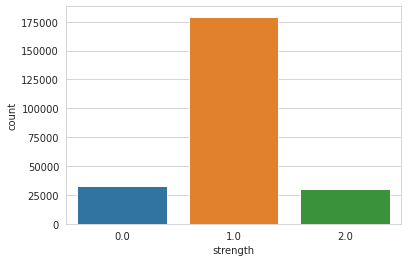

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

In [18]:
def words_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

In [20]:
X.shape

(241747, 116)

In [21]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
vectorizer.vocabulary_

{'\x05': 0,
 '\x08': 1,
 '\x10': 2,
 '\x16': 3,
 '\x17': 4,
 '\x19': 5,
 '\x1b': 6,
 '\x1c': 7,
 '\x1e': 8,
 ' ': 9,
 '!': 10,
 '"': 11,
 '#': 12,
 '$': 13,
 '%': 14,
 '&': 15,
 '(': 16,
 ')': 17,
 '*': 18,
 '+': 19,
 '-': 20,
 '.': 21,
 '/': 22,
 '0': 23,
 '1': 24,
 '2': 25,
 '3': 26,
 '4': 27,
 '5': 28,
 '6': 29,
 '7': 30,
 '8': 31,
 '9': 32,
 ';': 33,
 '<': 34,
 '=': 35,
 '>': 36,
 '?': 37,
 '@': 38,
 '[': 39,
 '\\': 40,
 ']': 41,
 '^': 42,
 '_': 43,
 '`': 44,
 'a': 45,
 'b': 46,
 'c': 47,
 'd': 48,
 'e': 49,
 'f': 50,
 'g': 51,
 'h': 52,
 'i': 53,
 'j': 54,
 'k': 55,
 'l': 56,
 'm': 57,
 'n': 58,
 'o': 59,
 'p': 60,
 'q': 61,
 'r': 62,
 's': 63,
 't': 64,
 'u': 65,
 'v': 66,
 'w': 67,
 'x': 68,
 'y': 69,
 'z': 70,
 '{': 71,
 '|': 72,
 '}': 73,
 '~': 74,
 '\x7f': 75,
 '\xa0': 76,
 '¡': 77,
 '¨': 78,
 '«': 79,
 '°': 80,
 '±': 81,
 '²': 82,
 '³': 83,
 '´': 84,
 'µ': 85,
 '·': 86,
 'º': 87,
 '¾': 88,
 '¿': 89,
 '×': 90,
 'ß': 91,
 'à': 92,
 'á': 93,
 'â': 94,
 'ä': 95,
 'å': 96,
 'æ': 

In [23]:
data.iloc[0][0]

'jaxiva842'

In [24]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
a,0.433750
x,0.411631
v,0.390411
j,0.374201
8,0.331005
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


In [25]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


ONE-ONE and ONE-REST

https://datastoriesweb.wordpress.com/2017/06/11/classification-one-vs-rest-and-one-vs-one/

In [28]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='ovr')

In [29]:
print(log_class.score(X_test,y_test))

0.8109824198552223


In [30]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.818841778697001


In [31]:
X_predict=np.array(["2DFSabc#d$$$$"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1.]


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier()

In [34]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
print(clf.score(X_test, y_test))

0.9451499482936918


In [36]:
print(clf.score(X_train,y_train))

0.9998293665361924
